In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from load_images import load_images
import image_utils
import fisherfaces

In [2]:
image_matrix, label_array, img_size = load_images('YaleB')
image_matrix_0, mean_face, std = image_utils.img_normalize(image_matrix)

In [3]:
[eigenvalues_lda, eigenvectors, mu_pca] = fisherfaces.fisherfaces(image_matrix_0, label_array)
transformed_data = np.matmul(image_matrix_0, eigenvectors)
fisher_components = eigenvectors.T


eigenfaces = fisher_components.reshape(-1, img_size[0], img_size[1])

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.axis('off')
plt.show()



In [31]:
explained_variance_absolute = np.var(transformed_data,axis=0,ddof=1)
explained_variance_ratio = explained_variance_absolute/sum(explained_variance_absolute)

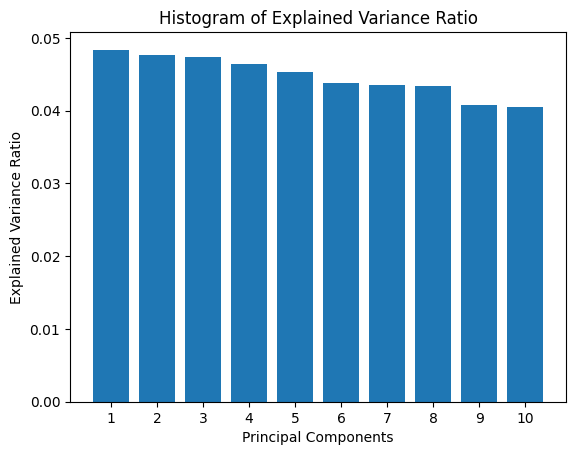

In [32]:
explained_variance_ratio = np.sort(explained_variance_ratio)
explained_variance_ratio = np.flip(explained_variance_ratio)
explained_variance = explained_variance_ratio[:10]
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Histogram of Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))  # Adding 1 to include all components in the axis
plt.show()

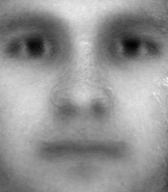

In [33]:
k = 200 # Image to be reconstructed


reconstructed_matrix = np.matmul(transformed_data, fisher_components)*std + mean_face

reconstructed_image = reconstructed_matrix[k,:].reshape(img_size)

# Apply min-max normalization to scale pixel values to 0-255 for display
min_val = np.min(reconstructed_image)
max_val = np.max(reconstructed_image)
reconstructed_image_normalized = 255 * (reconstructed_image - min_val) / (max_val - min_val)
reconstructed_image_normalized = Image.fromarray(np.uint8(reconstructed_image_normalized))

# Display the reconstructed image directly in the notebook
display(reconstructed_image_normalized)



Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

          01       1.00      1.00      1.00        16
          02       1.00      1.00      1.00        16
          03       1.00      1.00      1.00        16
          04       1.00      1.00      1.00        16
          05       1.00      1.00      1.00        16
          06       1.00      1.00      1.00        16
          07       1.00      1.00      1.00        16
          08       1.00      1.00      1.00        16
          09       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        15
          13       0.00      0.00      0.00        15
          15       1.00      1.00      1.00        16
          16       0.00      0.00      0.00        16
          17       1.00      1.00      1.00        16
          18       1.00      1.00      1.00

c:\Users\nesto\Python\SSDP_Miniproject_Eigenfaces\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nesto\Python\SSDP_Miniproject_Eigenfaces\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nesto\Python\SSDP_Miniproject_Eigenfaces\venv\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

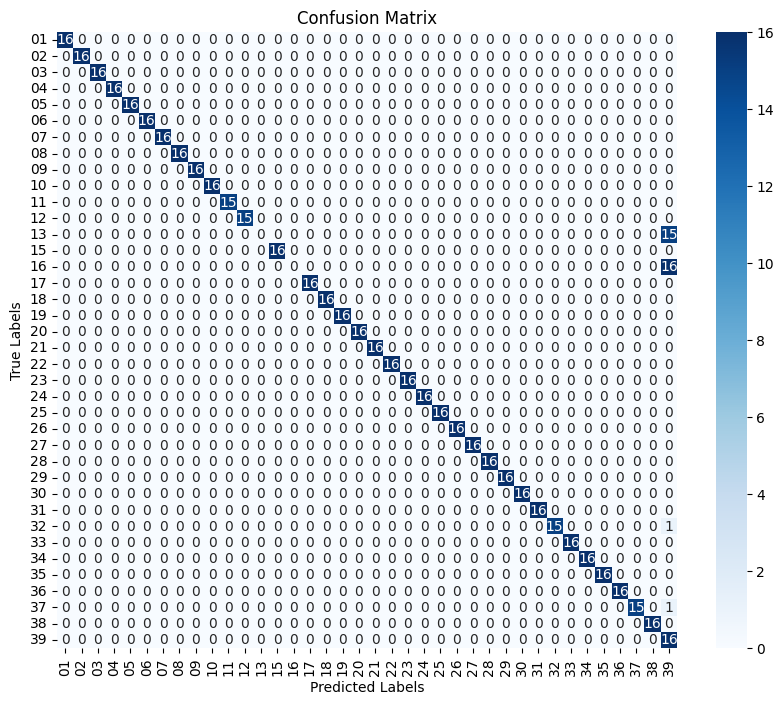

In [34]:
# Unique classes in the dataset
unique_classes = np.unique(label_array)

# Initialize lists to hold the split results
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

train_indices = []
test_indices = []

for cls in unique_classes:
    indices = np.where(label_array == cls)[0]
    train_idx, test_idx = train_test_split(indices, train_size=0.75, random_state=42, shuffle=True)
    train_indices.extend(train_idx)
    test_indices.extend(test_idx)

# Use the indices to split both the original and transformed datasets
X_train = transformed_data[train_indices]
X_test = transformed_data[test_indices]
y_train = label_array[train_indices]
y_test = label_array[test_indices]

svm = SVC(kernel='linear', random_state=42, C=0.001)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
    
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#
#print("Evaluation on Original Data with SVM:")
#evaluate_model(svm, X_train_pca, y_train, X_test_pca, y_test)